# Form Signatures across GB

This notebook explores creation of signatures based on form data only.

In [1]:
import dask.dataframe
import numpy as np

from clustergram import Clustergram

In [2]:
data = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/form/standardized/").set_index('hindex')
data = data.compute()
data

sdbAre_q1  sdbAre_q2  sdbAre_q3  sdbPer_q1  sdbPer_q2  \
hindex                                                                    
c000e094707t0000  -0.947406  -0.371977   0.020285  -0.901199  -0.237045   
c000e094763t0000  -0.913567  -0.420861  -0.271703  -0.903627  -0.428003   
c000e094763t0001  -0.878137  -0.411587  -0.284021  -0.900393  -0.416250   
c000e094763t0002  -0.952475  -0.421566  -0.283919  -0.968400  -0.429947   
c000e094764t0000  -0.964878  -0.420861  -0.271703  -0.972440  -0.420006   
...                     ...        ...        ...        ...        ...   
c102e644989t0111  -0.311466  -0.431706  -0.373463  -0.082269  -0.459270   
c102e644989t0112  -0.326671  -0.461825  -0.371855  -0.149873  -0.528701   
c102e644989t0113  -0.094236  -0.364761  -0.304254   0.024972  -0.347371   
c102e644989t0114  -0.477667  -0.568464  -0.390033  -0.600170  -0.646516   
c102e644989t0115  -0.413094  -0.545952  -0.382834  -0.400108  -0.610332   

                  sdbPer_q3  sdbCoA_q1  sdbCoA_q2  sdbCoA_q3  ssbCCo_q1  ...  \
hindex                                                                   ...   
c000e094707t0000  -0.023143  -0.000419  -0.001515  -0.010221  -0.046170  ...   
c000e094763t0000  -0.336729  -0.000419  -0.001515  -0.010221  -0.035325  ...   
c000e094763t0001  -0.350010  -0.000419  -0.001515  -0.010221  -0.034917  ...   
c000e094763t0002  -0.343165  -0.000419  -0.001515  -0.010221  -0.065649  ...   
c000e094764t0000  -0.315861  -0.000419  -0.001515  -0.010221  -0.066832  ...   
...                     ...        ...        ...        ...        ...  ...   
c102e644989t0111  -0.389532  -0.000419  -0.001515  -0.010221   0.132837  ...   
c102e644989t0112  -0.386678  -0.000419  -0.001515  -0.010221   0.136559  ...   
c102e644989t0113  -0.283669  -0.000419  -0.001515  -0.010221   0.021411  ...   
c102e644989t0114  -0.472676  -0.000419  -0.001515  -0.010221   0.424887  ...   
c102e644989t0115  -0.440413  -0.000419  -0.001515  -0.010221   0.160613  ...   

                  lseCWA_q3  lteOri_q1  lteOri_q2  lteOri_q3  lteWNB_q1  \
hindex                                                                    
c000e094707t0000   0.073064   0.031571   0.196520   0.424415  -0.611681   
c000e094763t0000  -0.254395  -1.016655  -0.161371   0.011093   0.148709   
c000e094763t0001  -0.285074  -0.897625  -0.161371   0.103698   0.148709   
c000e094763t0002  -0.280682  -0.927382  -0.161371   0.177408   0.302689   
c000e094764t0000  -0.280682  -1.016655  -0.104108   0.185348   0.302689   
...                     ...        ...        ...        ...        ...   
c102e644989t0111   0.199797   1.288365   0.440493   0.197816  -0.351250   
c102e644989t0112   0.195101   1.288365   0.440493   0.290197  -0.351250   
c102e644989t0113   0.199797   1.288365   0.440493   0.197816  -0.351250   
c102e644989t0114   0.008079  -0.855901   0.189420  -0.560233  -0.341815   
c102e644989t0115   0.008079  -0.203827   0.440493   0.231812  -0.351250   

                  lteWNB_q2  lteWNB_q3  lieWCe_q1  lieWCe_q2  lieWCe_q3  
hindex                                                                   
c000e094707t0000  -0.502087  -0.311160  -0.022562  -0.002733  -0.004738  
c000e094763t0000   0.214520  -0.125943  -0.019044  -0.002654  -0.004738  
c000e094763t0001   0.250036  -0.200268  -0.019323  -0.002654  -0.004738  
c000e094763t0002   0.250036  -0.120718  -0.018825  -0.002654  -0.004738  
c000e094764t0000   0.250036  -0.105044  -0.018825  -0.002659  -0.004738  
...                     ...        ...        ...        ...        ...  
c102e644989t0111  -0.580453  -0.704637  -0.000200  -0.002667  -0.004738  
c102e644989t0112  -0.580453  -0.693005  -0.000669  -0.002667  -0.004738  
c102e644989t0113  -0.580453  -0.704637  -0.000843  -0.002667  -0.004738  
c102e644989t0114  -0.580453  -0.704637  -0.000898  -0.002667  -0.004738  
c102e644989t0115  -0.580453  -0.638809  -0.000200  -0.002543  -0.004738  

[14539578 rows x 177 columns]

In [5]:
data = data.replace([np.inf, -np.inf], np.nan).fillna(0)

In [6]:
cgram = Clustergram(range(1, 25), method='minibatchkmeans', batch_size=1_000_000, n_init=10, random_state=42)
cgram.fit(data)

K=1 fitted in 100.34004878997803 seconds.
K=2 fitted in 105.75349235534668 seconds.
K=3 fitted in 112.56814789772034 seconds.
K=4 fitted in 116.6912133693695 seconds.
K=5 fitted in 121.92838835716248 seconds.
K=6 fitted in 195.55112075805664 seconds.
K=7 fitted in 197.22518277168274 seconds.
K=8 fitted in 177.77593088150024 seconds.
K=9 fitted in 181.51446080207825 seconds.
K=10 fitted in 182.09580779075623 seconds.
K=11 fitted in 196.21761012077332 seconds.
K=12 fitted in 212.0250701904297 seconds.
K=13 fitted in 205.14381861686707 seconds.
K=14 fitted in 210.53823852539062 seconds.
K=15 fitted in 217.61183094978333 seconds.
K=16 fitted in 230.33355617523193 seconds.
K=17 fitted in 238.15166425704956 seconds.
K=18 fitted in 244.98357105255127 seconds.
K=19 fitted in 246.77990651130676 seconds.
K=20 fitted in 250.02666759490967 seconds.
K=21 fitted in 254.85046243667603 seconds.
K=22 fitted in 271.6383490562439 seconds.
K=23 fitted in 274.8162724971771 seconds.
K=24 fitted in 274.70725

In [7]:
import urbangrammar_graphics as ugg
import seaborn as sns

sns.set(style='whitegrid')

CPU times: user 47.8 s, sys: 5.78 s, total: 53.6 s
Wall time: 53.5 s


(-20.0, 30.0)

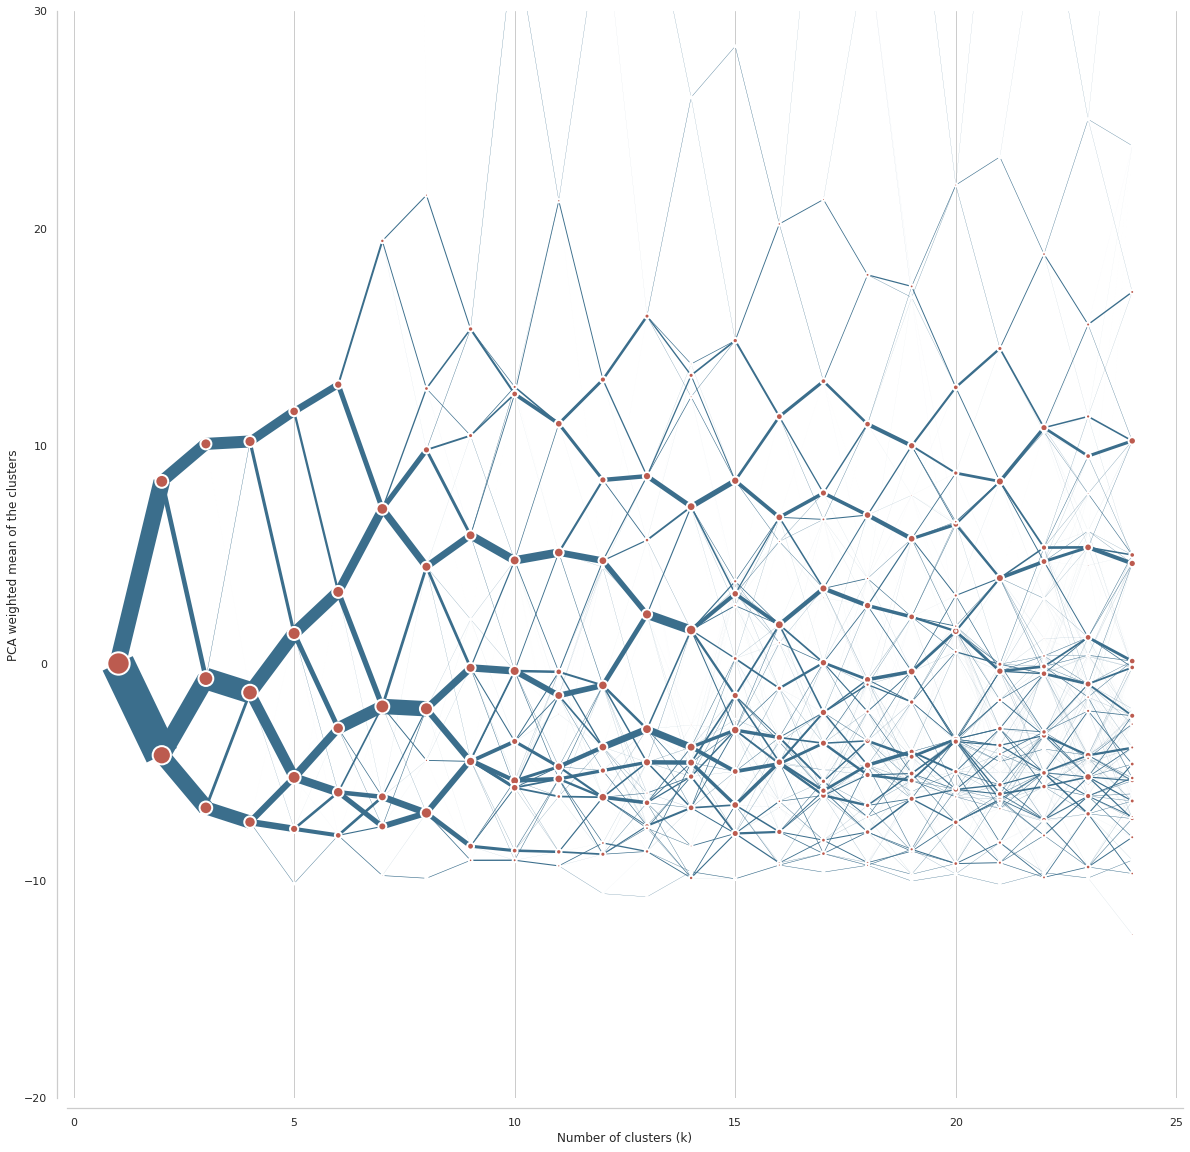

In [9]:
%%time

ax = cgram.plot(
    figsize=(20, 20),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_ylim(-20, 30)

In [10]:
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [11]:
fig = cgram.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
)
show(fig)

In [12]:
fig2 = cgram.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    pca_weighted=False
)
show(fig2)

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve

In [14]:
geom68 = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/tessellation/tess_68.pq", columns=["tessellation", "buildings", "hindex"])
geom68 = geom68.set_index("hindex")

In [15]:
labels = cgram.labels.copy()
labels.columns = labels.columns.astype("str")
labels.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_form_labels.pq")

In [17]:
labels.index = data.index

In [23]:
geom68["cluster24"] = labels["24"].loc[labels.index.str.startswith("c068")]

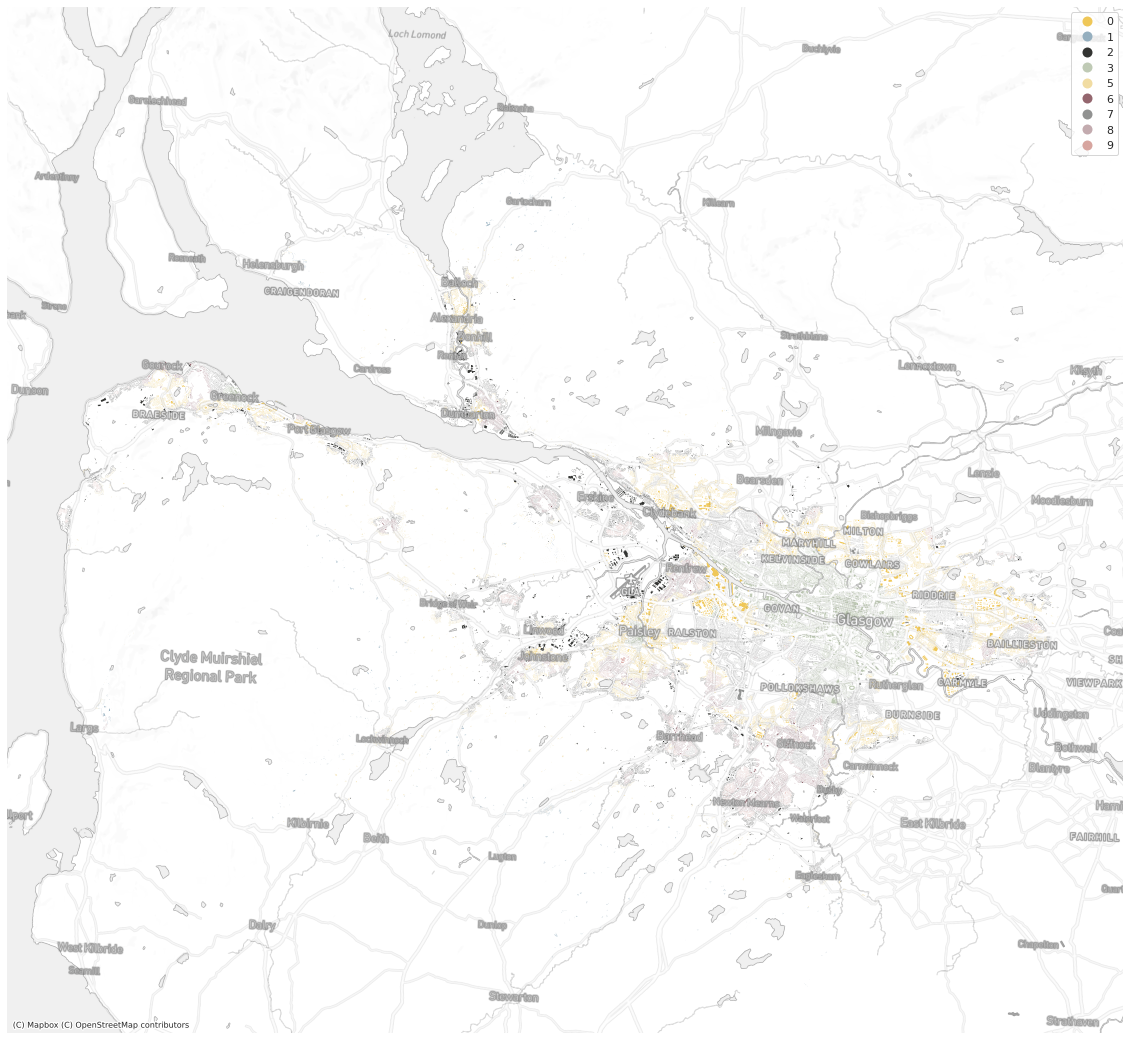

In [21]:
cmap = ugg.get_colormap(10, randomize=True)

token = "pk.eyJ1IjoibWFydGluZmxlaXMiLCJhIjoiY2tsNmhlemtxMmlicTJubXN6and5aTc2NCJ9.l7nSUXM7ZRjAWTB7oXiswQ"

ax = geom68.set_geometry("buildings").plot("cluster", figsize=(20, 20), zorder=1, linewidth=0, alpha=1, legend=True, cmap=cmap, categorical=True)
ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

In [24]:
geom68.set_geometry("buildings").drop(columns="tessellation").to_file("temp_gla.gpkg", driver="GPKG")